In [1]:
%matplotlib inline

import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance
import imageio
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import norm
import requests
import json
import os
from os.path import join, dirname, abspath
from glob import glob
import io
import pathlib
from pymongo import MongoClient
from datetime import datetime
from bson import ObjectId
from pyqtree import Index
from shapely import geometry
import random
import shapely.geometry as ge

import itertools
import networkx as nx

import shapely
import random

from shapely.geometry import LineString, Point



In [2180]:
server.stop()

In [2181]:
from sshtunnel import SSHTunnelForwarder
import pymongo
import os.path
from pymongo import MongoClient



REMOTE_ADDRESS = ('docdb-2019-06-13-11-43-18.cluster-cybs9fpwjg54.eu-west-1.docdb.amazonaws.com',27017)
MONGO_HOST = 'automotive.vizible.zone'

MONGO_DB = "VizibleZone"
MONGO_USER = "ubuntu"

pem_server_file = 'viziblezone-prod.pem'
pem_ca_file = 'rds-combined-ca-bundle.pem'
pem_path = '../pems/'

if not os.path.exists(pem_path + pem_server_file):
    pem_path=pem_path[1:]

server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_pkey = pem_path + pem_server_file,
    ssh_username=MONGO_USER,
    remote_bind_address=REMOTE_ADDRESS
)
server.stop()
server.start()

client = MongoClient('127.0.0.1',
                     server.local_bind_port,
                     username='viziblezone',
                     password='vz123456',
                     ssl=True,
                     ssl_match_hostname=False,
                     ssl_ca_certs=(pem_path + pem_ca_file),
                     authMechanism='SCRAM-SHA-1') # server.local_bind_port is assigned local port
db = client[MONGO_DB]
print('you are connected to Production server')
print(db.collection_names())



you are connected to Production server
['eliqbatterytest', 'eliqsensortest', 'logs', 'sensors', 'settings', 'statistics', 'useractivities', 'users', 'userstatistics']


In [594]:
from sshtunnel import SSHTunnelForwarder
import pymongo
import os.path
from pymongo import MongoClient

#connect to DEV

from sshtunnel import SSHTunnelForwarder
import pymongo

MONGO_HOST = 'dev.vizible.zone'
REMOTE_ADDRESS = ('127.0.0.1',27017)
MONGO_DB = "VizibleZone"
MONGO_USER = "ubuntu"

pem_server_file = 'automotive-dev.pem'
pem_path = '../pems/'
if not os.path.exists(pem_path + pem_server_file):
    pem_path=pem_path[1:]

server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_pkey = pem_path + pem_server_file,
    ssh_username=MONGO_USER,
    remote_bind_address=REMOTE_ADDRESS
)

server.start()

client = MongoClient('127.0.0.1',
                     server.local_bind_port) # server.local_bind_port is assigned local port
db = client[MONGO_DB]
print('you are connected to DEV server')
print(db.collection_names())

you are connected to DEV server
['users', 'statistics', 'logs', 'userstatistics', 'settings', 'sensors']


In [2094]:
server.stop()

In [2122]:
start_date="2019-07-22 00:00:00+0300"

try:  # check date string format
    start_date = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S%z")
except:
    raise ValueError("Time string should be of format: 2019-07-28 00:00:00+0300")

agg = db.sensors.aggregate([{"$match": { "createdAt": {"$gt": start_date}}}])
df = pd.DataFrame(agg)
df

,__v,_id,accelerometer,battery_percentage,createdAt,device_type,gps,gravity,gyroscope,light,...,sound_level,stand_still,status,steps,testing_mode,timestamp_local,timestamps,updatedAt,user_id,user_type
0,0,5d3563d7c587af7b09397f73,"{'value': [], 'z_axis': [-1.169921875, -1.0471...","{'value': ['100.0', '100.0', '100.0', '100.0',...",2019-07-22 07:20:55.586,iPhone 7,"{'speed': [25.27397918701172, 25.2739791870117...","{'value': [], 'z_axis': [-0.9336811900138855, ...","{'value': [], 'z_axis': [0.005285043183262248,...","{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",...,"{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",False,1,NaN,"{'value': ['ped: drive; phone: seat;', 'ped: d...",2019-07-22T09:34:59.419+03:00,"{'value': ['2019-07-22T09:33:59.592+03:00', '2...",2019-07-22 07:20:55.586,ms0Eg3WTooMYshw8vDA6tdTmJiM2,driver
1,0,5d3563d9c587af7b09397f83,"{'value': [], 'z_axis': [-0.9592132568359375, ...","{'value': ['100.0', '100.0', '100.0', '100.0',...",2019-07-22 07:20:57.727,iPhone 7,"{'speed': [28.30415916442871, 28.3041591644287...","{'value': [], 'z_axis': [-0.9309043288230896, ...","{'value': [], 'z_axis': [0.011460913751156002,...","{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",...,"{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",False,1,NaN,"{'value': ['ped: drive; phone: seat;', 'ped: d...",2019-07-22T09:36:59.417+03:00,"{'value': ['2019-07-22T09:35:59.528+03:00', '2...",2019-07-22 07:20:57.727,ms0Eg3WTooMYshw8vDA6tdTmJiM2,driver
2,0,5d3563dac587af7b09397f85,"{'value': [], 'z_axis': [-0.94366455078125, -0...","{'value': ['100.0', '100.0', '100.0', '100.0',...",2019-07-22 07:20:58.160,iPhone 7,"{'speed': [-1, -1, -1, -1, -1, -1, -1, -1, -1,...","{'value': [], 'z_axis': [-0.9278156161308289, ...","{'value': [], 'z_axis': [-0.011747203568339519...","{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",...,"{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",True,1,NaN,"{'value': ['ped: drive; phone: seat;', 'ped: d...",2019-07-22T10:02:59.419+03:00,"{'value': ['2019-07-22T10:01:59.543+03:00', '2...",2019-07-22 07:20:58.160,ms0Eg3WTooMYshw8vDA6tdTmJiM2,driver
3,0,5d3563dac587af7b09397f87,"{'value': [], 'z_axis': [-0.87847900390625, -0...","{'value': ['100.0', '100.0', '100.0', '100.0',...",2019-07-22 07:20:58.542,iPhone 7,"{'speed': [22.5537109375, 22.5537109375, 22.55...","{'value': [], 'z_axis': [-0.9486668705940247, ...","{'value': [], 'z_axis': [0.015530223896797077,...","{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",...,"{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",False,1,NaN,"{'value': ['ped: drive; phone: seat;', 'ped: d...",2019-07-22T09:49:59.418+03:00,"{'value': ['2019-07-22T09:48:59.521+03:00', '2...",2019-07-22 07:20:58.542,ms0Eg3WTooMYshw8vDA6tdTmJiM2,driver
4,0,5d3563e0c587af7b09397fc9,"{'value': [], 'z_axis': [-0.9391937255859375, ...","{'value': ['100.0', '100.0', '100.0', '100.0',...",2019-07-22 07:21:04.555,iPhone 7,"{'speed': [5.748813629150391, 5.74881362915039...","{'value': [], 'z_axis': [-0.9665095210075378, ...","{'value': [], 'z_axis': [-0.23180686760267705,...","{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",...,"{'value': [], 'z_axis': [], 'y_axis': [], 'x_a...",False,1,NaN,"{'value': ['ped: drive; phone: seat;', 'ped: d...",2019-07-22T10:14:59.420+03:00,"{'value': ['2019-07-22T10:13:59.452+03:00', '2...",2019-07-22 07:21:04.555,ms0Eg3WTooMYshw8vDA6tdTmJiM2,driver
5,0,5d3540abc587af7b09397f13,"{'number_of_samples': 600, 'x_axis': [-0.31093...","{'number_of_samples': 600, 'value': [71, 71, 7...",2019-07-22 04:50:51.982,Xiaomi (POCOPHONE F1),"{'accuracy': [3.9000000953674316, 3.9000000953...","{'number_of_samples': 600, 'x_axis': [-0.38522...","{'number_of_samples': 600, 'x_axis': [0.111723...","{'number_of_samples': 600, 'value': [0, 0, 0, ...",...,"{'number_of_samples': 600, 'value': [0, 0, 0, ...",False,1,NaN,,2019-07-19T22:17:37.614+03:00,"{'number_of_samples': 600, 'value': ['2019-07-...",2019-07-22 04:50:51.982,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
6,0,5d3540aec587af

In [2124]:
df['user_id'].unique()

array(['ms0Eg3WTooMYshw8vDA6tdTmJiM2', 'w5BVNJjemxd4wEU9OHBvVRFfpTx2',
       'rZBbw12NtJYWsDqgomNJSg9z7ii1', 'gTKE37r5uQddYly3OcGMwcK4Rq63',
       '5AJ5UfxNr8MdkN7vllAh85FEojD3', nan,
       'KY8z58seywerD9LGa8RdcUylxQc2', 'FF1rx9kMHgbqb7gjF1Xjz1ojkW12',
       'Wd9IyWLQcLbtEpqXWWy1uyEY6HE2', 'sFH5TvOX8rcT7MTCTwEvlBWaQBw2',
       'J48gG0h7qPTTpW73UWNDcS2Fbud2', 'SEsDRlNS7XZaxexj81mkEActtr33',
       '2682kWWSzTOc1jCWCGw5d2HdRTi1', 'Iotl57z4UBVRuEMgoa4AuLGjQc32',
       'Tkp4epwwpnRn9MecFkGZqZubfwC3', '3SC8koSbXoNhcWsqTDuTArl2KHh1'],
      dtype=object)

In [2125]:
users=df['user_id'].unique()

In [1291]:
df['testing_mode_']=df['testing_mode'].apply(lambda x: set(x['value']))

In [864]:
df.iloc[0]['testing_mode_']

{''}

In [865]:
df['testing_mode_']=df['testing_mode_'].apply(lambda x: list(x)[0] if len(x)>0 else "")

In [866]:
df[df['testing_mode_']!='']

,__v,_id,accelerometer,battery_percentage,createdAt,device_type,gps,gravity,gyroscope,light,...,stand_still,status,steps,testing_mode,timestamp_local,timestamps,updatedAt,user_id,user_type,testing_mode_
171,0,5d513f3948f5006187ac7640,"{'number_of_samples': 595, 'x_axis': [-0.00957...","{'number_of_samples': 595, 'value': [39, 39, 3...",2019-08-12 10:28:09.581,samsung (SM-A105G),"{'accuracy': [5.145999908447266, 5.14599990844...","{'number_of_samples': 595, 'x_axis': [0, 0, 0,...","{'number_of_samples': 595, 'x_axis': [0, 0, 0,...","{'number_of_samples': 595, 'value': [0, 0, 0, ...",...,True,1,"{'number_of_samples': 595, 'value': [0, 0, 0, ...","{'number_of_samples': 595, 'value': ['check_15...",2019-08-12T13:28:07.487+03:00,"{'number_of_samples': 595, 'value': ['2019-08-...",2019-08-12 10:28:09.581,3SC8koSbXoNhcWsqTDuTArl2KHh1,pedestrian,check_15
173,0,5d5140d848f5006187ac7664,"{'number_of_samples': 600, 'x_axis': [0.050247...","{'number_of_samples': 600, 'value': [61, 61, 6...",2019-08-12 10:35:04.619,samsung (SAMSUNG-SM-G930A),"{'accuracy': [13.10099983215332, 13.1009998321...","{'number_of_samples': 600, 'x_axis': [0.070861...","{'number_of_samples': 600, 'x_axis': [0, 0, 0,...","{'number_of_samples': 600, 'value': [307, 307,...",...,True,1,"{'number_of_samples': 600, 'value': [0, 0, 0, ...","{'number_of_samples': 600, 'value': ['check15'...",2019-08-12T13:35:03.283+03:00,"{'number_of_samples': 600, 'value': ['2019-08-...",2019-08-12 10:35:04.619,w5BVNJjemxd4wEU9OHBvVRFfpTx2,pedestrian,check15
175,0,5d51411448f5006187ac7668,"{'number_of_samples': 593, 'x_axis': [0.052642...","{'number_of_samples': 593, 'value': [60, 60, 6...",2019-08-12 10:36:04.320,samsung (SAMSUNG-SM-G930A),"{'accuracy': [9.621999740600586, 9.62199974060...","{'number_of_samples': 593, 'x_axis': [0.063787...","{'number_of_samples': 593, 'x_axis': [0, 0, 0,...","{'number_of_samples': 593, 'value': [362, 362,...",...,True,1,"{'number_of_samples': 593, 'value': [0, 0, 0, ...","{'number_of_samples': 593, 'value': ['check16'...",2019-08-12T13:36:03.274+03:00,"{'number_of_samples': 593, 'value': ['2019-08-...",2019-08-12 10:36:04.320,w5BVNJjemxd4wEU9OHBvVRFfpTx2,pedestrian,check16
176,0,5d51411948f5006187ac766a,"{'number_of_samples': 594, 'x_axis': [-0.05267...","{'number_of_samples': 594, 'value': [37, 37, 3...",2019-08-12 10:36:09.539,samsung (SM-A105G),"{'accuracy': [8.890000343322754, 8.89000034332...","{'number_of_samples': 594, 'x_axis': [0, 0, 0,...","{'number_of_samples': 594, 'x_axis': [0, 0, 0,...","{'number_of_samples': 594, 'value': [0, 0, 0, ...",...,True,1,"{'number_of_samples': 594, 'value': [0, 0, 0, ...","{'number_of_samples': 594, 'value': ['check_16...",2019-08-12T13:36:07.493+03:00,"{'number_of_samples': 594, 'value': ['2019-08-...",2019-08-12 10:36:09.539,3SC8koSbXoNhcWsqTDuTArl2KHh1,pedestrian,check_16
177,0,5d51415548f5006187ac7670,"{'number_of_samples': 595, 'x_axis': [-0.04788...","{'number_of_samples': 595, 'value': [37, 37, 3...",2019-08-12 10:37:09.583,samsung (SM-A105G),"{'accuracy': [7.291999816894531, 7.29199981689...","{'number_of_samples': 595, 'x_axis': [0, 0, 0,...","{'number_of_samples': 595, 'x_axis': [0, 0, 0,...","{'number_of_samples': 595, 'value': [0, 0, 0, ...",...,False,1,"{'number_of_samples': 595, 'value': [0, 0, 0, ...","{'number_of_samples': 595, 'value': ['check_16...",2019-08-12T13:37:07.498+03:00,"{'number_of_samples': 595, 'value': ['2019-08-...",2019-08-12 10:37:09.583,3SC8koSbXoNhcWsqTDuTArl2KHh1,pedestrian,check_16
183,0,5d5142c348f5006187ac7680,"{'number_of_samples': 598, 'x_axis': [0.396102...","{'number_of_samples': 598, 'value': [80, 80, 8...",2019-08-12 10:43:15.912,Xiaomi (Mi A1),"{'accuracy': [9.04699993133545, 9.046999931335...","{'number_of_samples': 598, 'x_axis': [0.426912...","{'number_of_samples': 598, 'x_axis': [-0.01596...","{'number_of_samples': 598, 'value': [766, 784,...",...,True,1,"{'number_of_samples': 598, 'value': [6849, 684...","{'number_of_samples': 598, 'value': ['check 17...",2019-

In [2126]:
users

array(['ms0Eg3WTooMYshw8vDA6tdTmJiM2', 'w5BVNJjemxd4wEU9OHBvVRFfpTx2',
       'rZBbw12NtJYWsDqgomNJSg9z7ii1', 'gTKE37r5uQddYly3OcGMwcK4Rq63',
       '5AJ5UfxNr8MdkN7vllAh85FEojD3', nan,
       'KY8z58seywerD9LGa8RdcUylxQc2', 'FF1rx9kMHgbqb7gjF1Xjz1ojkW12',
       'Wd9IyWLQcLbtEpqXWWy1uyEY6HE2', 'sFH5TvOX8rcT7MTCTwEvlBWaQBw2',
       'J48gG0h7qPTTpW73UWNDcS2Fbud2', 'SEsDRlNS7XZaxexj81mkEActtr33',
       '2682kWWSzTOc1jCWCGw5d2HdRTi1', 'Iotl57z4UBVRuEMgoa4AuLGjQc32',
       'Tkp4epwwpnRn9MecFkGZqZubfwC3', '3SC8koSbXoNhcWsqTDuTArl2KHh1'],
      dtype=object)

In [2184]:
user_id=users[0]

In [2185]:
user_id


'ms0Eg3WTooMYshw8vDA6tdTmJiM2'

In [2289]:

def convert_str_to_datetime(row):
    t = row['timestamp_local']
    return datetime.strptime(t[:-3] + t[-2:], '%Y-%m-%dT%H:%M:%S.%f%z')


def get_id_list_from_user(user_id, start_date, end_date, device_type=0, params={"max_speed": 0.5, "min_speed": 4,
                                                                                "min_accuracy": 15, "delta_lat": 0.0001,
                                                                                "max_dist_km2min": 0.16,
                                                                                "gap_time": 5 * 60}):
    
   
    # Query mongo DB for "walking" sessions
    # returns a list of IDs
    # Version 1.02, 31-07-19
    #
    # future changes: filter based on the step counter
    #
    # params:
    # max_speed: 0.5 m/s, the lower threshold of max speed (less than that is no movement)
    # min_speed: 6 m/s, the upper threshold of min speed (more than that is driving)
    # min_accuracy: 15 m, the lower threshold of min_accuracy (more than that is bad GPS reception)
    # delta_lat: 0.0001, minimum latitute change (about 10 m North/South)
    # max_dist_km2min: 0.2 km, maximum allowed distance to be travelled in 1 minute
    # gap_time: 10*60 sec, gap between sessions to be considered a new session

    print(user_id)
    if device_type == 0:
        agg_code = [
            {"$match": {"user_id": user_id, "createdAt": {"$gt": start_date}}},
            {"$project": {"speed": "$gps.speed",
                          "_id": "$_id",
                          "timestamp_local": "$timestamp_local",
                          "gps_accuracy": "$gps.accuracy",
                          "latitude": "$gps.latitude",
                          "longitude": "$gps.longitude",
                          "elapsed_time": {"$multiply": ["$gps.number_of_samples", "$sample_period"]}
                          }},
            {"$project": {"_id": "$_id",
                          "max_speed": {"$max": "$speed"},
                          "min_speed": {"$min": "$speed"},
                          "delta_lat": {"$subtract": [{"$max": "$latitude"}, {"$min": "$latitude"}]},
                          "delta_long": {"$subtract": [{"$max": "$longitude"}, {"$min": "$longitude"}]},
                          "max_lat": {"$max": "$latitude"},
                          "min_accuracy": {"$min": "$gps_accuracy"},
                          "timestamp_local": "$timestamp_local",
                          "elapsed_time": "$elapsed_time"}},
            {"$match": {"max_speed": {"$lt": params['min_speed'],"$gt": params['max_speed']},
                        "min_accuracy": {"$lt": params["min_accuracy"]}, "delta_lat": {"$gt": params["delta_lat"]}}},
            {"$project": {"_id": "$_id", "timestamp_local": "$timestamp_local",
                          "elapsed_time": "$elapsed_time", "max_speed": "$max_speed",
                          "delta_lat": "$delta_lat", "delta_long": "$delta_long", "max_lat": "$max_lat"}}
        ]
    else:
        agg_code = [
            {"$match": {"user_id": user_id, "device_type": device_type, "createdAt": {"$gt": start_date}}},
            {"$project": {"speed": "$gps.speed",
                          "_id": "$_id",
                          "timestamp_local": "$timestamp_local",
                          "gps_accuracy": "$gps.accuracy",
                          "latitude": "$gps.latitude",
                          "longitude": "$gps.longitude",
                          "elapsed_time": {"$multiply": ["$gps.number_of_samples", "$sample_period"]}
                          }},
            {"$project": {"_id": "$_id",
                          "max_speed": {"$max": "$speed"},
                          "min_speed": {"$min": "$speed"},
                          "delta_lat": {"$subtract": [{"$max": "$latitude"}, {"$min": "$latitude"}]},
                          "delta_long": {"$subtract": [{"$max": "$longitude"}, {"$min": "$longitude"}]},
                          "max_lat": {"$max": "$latitude"},
                          "min_accuracy": {"$min": "$gps_accuracy"},
                          "timestamp_local": "$timestamp_local",
                          "elapsed_time": "$elapsed_time"}},
            {"$match": {"max_speed": {"$lt": params['min_speed'],"$gt": params['max_speed']},
                        "min_accuracy": {"$lt": params["min_accuracy"]}, "delta_lat": {"$gt": params["delta_lat"]}}},
            {"$project": {"_id": "$_id", "timestamp_local": "$timestamp_local",
                          "elapsed_time": "$elapsed_time", "max_speed": "$max_speed",
                          "delta_lat": "$delta_lat", "delta_long": "$delta_long", "max_lat": "$max_lat"}}
        ]

    
    agg = db.sensors.aggregate(agg_code)
    df = pd.DataFrame(agg)
    print(len(df))
    if len(df) == 0:
        return []

    df["_id"] = df._id.apply(str)

    # filtering for the relevant times
    df["timestamp_local"] = df.apply(convert_str_to_datetime, axis=1)
    df = df[df.timestamp_local >= start_date]
    df = df[df.timestamp_local <= end_date]
    if len(df) == 0:
        return []

    # sort by time
    df = df.sort_values(['timestamp_local'])
    df = df.reset_index(drop=True)

    # dropping sessions with too large distance (probably driving)
    dlat_km = np.array(df.delta_lat) * 111.7
    dlong_km = np.array(df.delta_lat) * 40075 / 360 * np.cos(np.array(df.max_lat) / 180 * np.pi)
    dist_km = np.sqrt(dlat_km ** 2 + dlong_km ** 2)
    dist_km2min = dist_km / np.array(df.elapsed_time) * 60
    df = df.iloc[dist_km2min < params["max_dist_km2min"]]
    if len(df) == 0:
        return []

    # finding where gap between sessions is high -> a new list
    t = np.array(df.timestamp_local)
    t2 = np.array(df.timestamp_local.shift())
    try:
        dt = (t - t2)
    except:
        return df
    dt[0] = 0
    dt = np.array([float(i) for i in dt]) / 10 ** 9
    et = np.array(df.elapsed_time.shift())
    et[0] = 0
    tot_dt = dt - et
    session_idx = np.concatenate([[0], np.where(tot_dt > params["gap_time"])[0], [len(t)]], axis=0)

    list_ids = list(df._id)
    list_of_lists = []
    for i in range(len(session_idx) - 1):
        list_i = list_ids[session_idx[i]:session_idx[i + 1]]
        if len(list_i) > 0:
            list_of_lists.append(list_i)
    return list_of_lists


In [2250]:
end_date="2019-07-23 00:00:00+0300"

try:  # check date string format
    end_date = datetime.strptime(end_date, "%Y-%m-%d %H:%M:%S%z")
except:
    raise ValueError("Time string should be of format: 2019-07-28 00:00:00+0300")


In [2290]:
device_type='iPhone 7'
device_type='samsung (SM-G955F)'
device_type=0
#ids_sessions=get_id_list_from_user(user_id,start_date,end_date, device_type)
ids_sessions=get_id_list_from_user(user_id,start_date,end_date)

ms0Eg3WTooMYshw8vDA6tdTmJiM2


	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  """



912


In [2255]:
user_id

'ms0Eg3WTooMYshw8vDA6tdTmJiM2'

In [2256]:
len(ids_sessions)

22

In [2204]:

import math

# {['latitude':1]},'gps_longitude':1 ,'gps_speed':1 

def read_VZ_from_mongo(_id):
    df_tmp=pd.DataFrame()
    dfjson=pd.DataFrame(db.sensors.find({"_id": ObjectId(_id)}))
    #ignore light and sound_level
    try:
        dfjson=dfjson.drop(columns=['sound_level','light'])
    except:
        pass
    #find number_of_samples
    vecs_dct={}
    singles_dct={}
    for column in dfjson.columns:
        try:
            if dfjson[column][0]["number_of_samples"]>0:
                vecs_dct[column]=dfjson[column][0]["number_of_samples"]
        except:
            singles_dct[column]=dfjson[column][0]
    nos=min(vecs_dct.values()) #number_of_samples
    if max(vecs_dct.values())>min(vecs_dct.values()):
        print('NOTE: number_of_samples varies by {}'.format(max(vecs_dct.values())-min(vecs_dct.values())))
    for column in vecs_dct.keys():
        for key in dfjson[column][0].keys():
            if key!="number_of_samples" and len(dfjson[column][0][key])>=nos:
                col_name=column+'_'+key
                col_name=col_name.replace('bearing','azimuth')
                col_name=col_name.replace('testing_mode_value','testing_mode')
                df_tmp[col_name]=dfjson[column][0][key][:nos]
    for column in singles_dct.keys():
        df_tmp[column]=singles_dct[column]
    #correct and add columns
    
    #clean zeros in the lat/long reading
    df_tmp=df_tmp[df_tmp["gps_latitude"]<df_tmp["gps_latitude"].median()+1]
    df_tmp=df_tmp[df_tmp["gps_latitude"]>df_tmp["gps_latitude"].median()-1]
    
    df_tmp['linear_acceleration_x']=df_tmp['accelerometer_x_axis']-df_tmp['gravity_x_axis']
    df_tmp['linear_acceleration_y']=df_tmp['accelerometer_y_axis']-df_tmp['gravity_y_axis']    
    df_tmp['linear_acceleration_z']=df_tmp['accelerometer_z_axis']-df_tmp['gravity_z_axis']
    
    def calc_tot_acceleration(row):
        r=row['linear_acceleration_x']**2+row['linear_acceleration_y']**2+row['linear_acceleration_z']**2
        return r**0.5

    def calc_tot_gyro(row):
        r=row['gyroscope_x_axis']**2+row['gyroscope_y_axis']**2+row['gyroscope_z_axis']**2
        return r**0.5

    df_tmp['linear_acceleration']=df_tmp.apply(calc_tot_acceleration, axis=1)
    df_tmp['gyroscope_tot']=df_tmp.apply(calc_tot_gyro, axis=1)


    def convert_str_to_datetime(row):
        t = row['timestamp_local']
        return datetime.strptime(t[:-3] + t[-2:], '%Y-%m-%dT%H:%M:%S.%f%z')

    df_tmp['timestamp']=df_tmp.apply(convert_str_to_datetime, axis=1)
    start_time=df_tmp.timestamp.min()

    def make_time_in_ms(row):
        return (row.timestamp-start_time).total_seconds()*1000

    df_tmp['time_since_start_in_ms']=df_tmp.apply(make_time_in_ms, axis=1)
    return df_tmp

In [2205]:
#pd.DataFrame(db.sensors.find({ 'user_id': "rZBbw12NtJYWsDqgomNJSg9z7ii1" })) 


In [2206]:

def get_df_for_ids(ids):
        
    print(len(ids))
    # list_ids=list(df_walk._id)
    df_vz= pd.DataFrame()
    for _id in ids:
        try:
            df_tmp=read_VZ_from_mongo(_id)
            df_vz=pd.concat([df_vz,df_tmp], axis=0)
        except:
            print('problem with id {}'.format(_id))
        
#    df_vz['timestamp']=df_vz.apply(convert_str_to_datetime, axis=1)
    df_vz=df_vz.sort_values(['timestamp'])
    return df_vz.reset_index(drop=True)

In [2207]:
def point_edge_distance(row):
    point= ge.Point(row['gps_longitude'],row['gps_latitude'])
    edge=row['nearest_edge']

    return point.distance(edge[0])*10000

def getExtrapoledLine(p1,p2):
    'Creates a line extrapoled in p1->p2 direction'
    EXTRAPOL_RATIO = 2
    a = p1
    a = (p1[0]-EXTRAPOL_RATIO*(p2[0]-p1[0]), p1[1]-EXTRAPOL_RATIO*(p2[1]-p1[1]) )
    b = (p1[0]+EXTRAPOL_RATIO*(p2[0]-p1[0]), p1[1]+EXTRAPOL_RATIO*(p2[1]-p1[1]) )
    return LineString([a,b])


def count_intersections(part_susp_cross, original_for_padding):
    print(part_susp_cross.index)
    print(original_for_padding.index)

    pos=0
    neg=0


    closest_point_index= part_susp_cross['dist_from_edge'].idxmin()
    print('min index ',closest_point_index)
    for i in range(len(original_for_padding)*2):
        try:
            print(original_for_padding.index[0], closest_point_index - 1)
            print(closest_point_index+1,original_for_padding.index[-1])
            r1 = random.randint(original_for_padding.index[0], closest_point_index - 1)

            r2=random.randint(closest_point_index+1,original_for_padding.index[-1])
  
            print(r1,r2)

            A=ge.Point( original_for_padding.loc[r1]['gps_longitude'],  original_for_padding.loc[r1]['gps_latitude'])
            B=ge.Point( original_for_padding.loc[r2]['gps_longitude'],  original_for_padding.loc[r2]['gps_latitude'])

            line1 = LineString([A, B])
            line2 = original_for_padding.loc[closest_point_index]['nearest_edge'][0]
    #        print(line2.length*100000)
            if line2.length*100000 < 6:
                print('EXTENDED')
                line2=getExtrapoledLine(line2.coords[0],line2.coords[-1])
                

            int_ptr = line1.intersection(line2)

            if not int_ptr:
                neg+=1
            else:
                pos+=1
        except:
            print('failed to count intersections')
            return (closest_point_index,0)

    return (closest_point_index, (pos/(pos+neg) if pos+neg!=0 else 0))

def nearest_edges(row, graph_edges):
    point= ge.Point(row['gps_longitude'],row['gps_latitude'])
    
    edges_with_distances = [
        (
            graph_edge,
            point.distance(graph_edge[0])
        )
        for graph_edge in graph_edges
    ]

    edges_with_distances = sorted(edges_with_distances, key=lambda x: x[1])
    return [e[0] for e in edges_with_distances][0:12]

def nearest_edge(row, map_indices_edges ):
    point= ge.Point(row['gps_longitude'],row['gps_latitude'])
    if row.name in map_indices_edges.index:
        return map_indices_edges.loc[row.name]['nearest_edges'][0]
    edges_to_check= map_indices_edges[map_indices_edges.index > row.name].iloc[0]['nearest_edges'] + map_indices_edges[map_indices_edges.index < row.name].iloc[-1]['nearest_edges'] 
    edges_with_distances = [
        (
            graph_edge,
            point.distance(graph_edge[0])
        )
        for graph_edge in edges_to_check
    ]

    edges_with_distances = sorted(edges_with_distances, key=lambda x: x[1])
    return [e[0] for e in edges_with_distances][0]

In [2291]:
ids_sessions

[['5d3563d6c587af7b09397f65'],
 ['5d3563d9c587af7b09397f7f', '5d3563ddc587af7b09397fa7'],
 ['5d356f74c587af7b09397ff1',
  '5d356f74c587af7b09397fef',
  '5d356f74c587af7b09397ff3'],
 ['5d3585f8c587af7b09398019',
  '5d3585e9c587af7b09398015',
  '5d3585edc587af7b09398017',
  '5d358606c587af7b0939801f'],
 ['5d358606c587af7b0939801d',
  '5d358eb6c587af7b09398032',
  '5d3585e7c587af7b09398013',
  '5d358601c587af7b0939801b',
  '5d3586a8c587af7b09398025'],
 ['5d358eb6c587af7b09398030'],
 ['5d359d96c587af7b0939804e', '5d359ec2c587af7b09398052'],
 ['5d35a24dc587af7b0939808c', '5d35a467c587af7b09398096'],
 ['5d35a7b8c587af7b093980ba', '5d35a772c587af7b093980b8'],
 ['5d35aadbc587af7b093980ea'],
 ['5d35ae80c587af7b0939814e',
  '5d35aedec587af7b09398156',
  '5d35aef8c587af7b09398158'],
 ['5d361265c587af7b09398725'],
 ['5d35b7f1c587af7b09398206',
  '5d35b7f1c587af7b09398204',
  '5d35b8d6c587af7b09398218',
  '5d35b910c587af7b0939821a'],
 ['5d35db7fc587af7b09398537',
  '5d35bd48c587af7b0939826e',
  '5d

In [2275]:
print('retreiving data from server')

#ids_sessions=[[str(i) for i in list(df['_id'])]]
res=[]
ids=ids_sessions[-2]
print('get_df_for_ids')
df_AS=get_df_for_ids(ids)

print('dataframe is ready')

#    res+=crossings_info_from_df(df_AS)
print(len(res))

retreiving data from server
get_df_for_ids
44


of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.



NOTE: number_of_samples varies by 2
NOTE: number_of_samples varies by 3
NOTE: number_of_samples varies by 6
NOTE: number_of_samples varies by 2
NOTE: number_of_samples varies by 3
NOTE: number_of_samples varies by 5
NOTE: number_of_samples varies by 6
NOTE: number_of_samples varies by 3
NOTE: number_of_samples varies by 4
NOTE: number_of_samples varies by 6
NOTE: number_of_samples varies by 9
NOTE: number_of_samples varies by 2
NOTE: number_of_samples varies by 5
NOTE: number_of_samples varies by 1
NOTE: number_of_samples varies by 4
NOTE: number_of_samples varies by 7
NOTE: number_of_samples varies by 1
NOTE: number_of_samples varies by 5
NOTE: number_of_samples varies by 9
NOTE: number_of_samples varies by 3
NOTE: number_of_samples varies by 5
NOTE: number_of_samples varies by 1
NOTE: number_of_samples varies by 4
NOTE: number_of_samples varies by 6
NOTE: number_of_samples varies by 1
NOTE: number_of_samples varies by 4
NOTE: number_of_samples varies by 8
NOTE: number_of_samples vari

In [2276]:
df_AS=df_AS.sort_values('timestamps_value').reset_index(drop=True)    #tocommit

In [2292]:
df_AS

,__v,_id,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,createdAt,device_type,gps_accuracy,gps_altitude,...,stand_still,status,testing_mode,time_since_start_in_ms,timestamp,timestamp_local,timestamps_value,updatedAt,user_id,user_type
0,0,5d3696a6c587af7b09398eb5,0.910761,-10.067118,0.288695,24,2019-07-23 05:09:58.621,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:49.825+03:00,2019-07-23 05:09:58.621,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
1,0,5d36a314c587af7b0939909e,0.910761,-10.067118,0.288695,24,2019-07-23 06:03:00.807,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:49.825+03:00,2019-07-23 06:03:00.807,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
2,0,5d368dbec587af7b09398d63,0.910761,-10.067118,0.288695,24,2019-07-23 04:31:58.987,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:49.825+03:00,2019-07-23 04:31:58.987,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
3,0,5d3696a6c587af7b09398eb5,-0.591204,-10.095864,0.556989,24,2019-07-23 05:09:58.621,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:49.925+03:00,2019-07-23 05:09:58.621,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
4,0,5d36a314c587af7b0939909e,-0.591204,-10.095864,0.556989,24,2019-07-23 06:03:00.807,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:49.925+03:00,2019-07-23 06:03:00.807,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
5,0,5d368dbec587af7b09398d63,-0.591204,-10.095864,0.556989,24,2019-07-23 04:31:58.987,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:49.925+03:00,2019-07-23 04:31:58.987,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
6,0,5d36a314c587af7b0939909e,-0.598390,-11.655321,-0.264661,24,2019-07-23 06:03:00.807,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:50.027+03:00,2019-07-23 06:03:00.807,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
7,0,5d3696a6c587af7b09398eb5,-0.598390,-11.655321,-0.264661,24,2019-07-23 05:09:58.621,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:50.027+03:00,2019-07-23 05:09:58.621,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
8,0,5d368dbec587af7b09398d63,-0.598390,-11.655321,-0.264661,24,2019-07-23 04:31:58.987,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:50.027+03:00,2019-07-23 04:31:58.987,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian
9,0,5d3696a6c587af7b09398eb5,2.496568,-10.836067,-2.882918,24,2019-07-23 05:09:58.621,Xiaomi (POCOPHONE F1),6.999000,782.526123,...,True,1,,0.0,2019-07-22 22:50:49.733000+03:00,2019-07-22T22:50:49.733+03:00,2019-07-22T22:49:50.127+03:00,2019-07-23 05:09:58.621,ms0Eg3WTooMYshw8vDA6tdTmJiM2,pedestrian


In [2277]:
#df_AS=df_AS.iloc[22458:]

In [2278]:
df_AS['timestamps_value'].min()

'2019-07-22T22:49:49.825+03:00'

In [2279]:
df_AS['timestamps_value'].max()

'2019-07-22T23:28:45.740+03:00'

In [2280]:
df_AS['gps_speed'].max()

3.919999837875366

In [2281]:
#df_AS=df_AS.sort_values('timestamp')

In [2282]:
#df_AS=df_AS[df_AS['gps_accuracy']<6]

In [2284]:
middle_loc=(df_AS['gps_latitude'].median(axis=0), df_AS['gps_longitude'].median(axis=0))
max_dist=max(geopy.distance.distance((df_AS['gps_latitude'].max(axis=0), middle_loc[1]), middle_loc).m,
            geopy.distance.distance((df_AS['gps_latitude'].min(axis=0), middle_loc[1]), middle_loc).m,
            geopy.distance.distance((middle_loc[0], df_AS['gps_longitude'].max(axis=0)), middle_loc).m,
            geopy.distance.distance((middle_loc[0], df_AS['gps_longitude'].min(axis=0)), middle_loc).m)

In [2285]:
max_dist

18787.21717122963

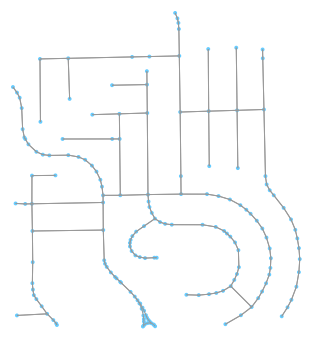

(<Figure size 384.92x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x207a4af1518>)

In [2286]:
G = ox.graph_from_point(middle_loc, distance= 400, network_type='drive',simplify=False)
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [2238]:
print('map is ready')

unique_locs_df= df_AS[['gps_longitude','gps_latitude']].drop_duplicates(['gps_longitude','gps_latitude']).reset_index()

walk_pois=[ge.Point(row[1]['gps_longitude'],row[1]['gps_latitude']) for row in unique_locs_df.iterrows()]

print('computing nearest edge...')

walk_pois_df =df_AS[['gps_longitude','gps_latitude']].drop_duplicates(['gps_longitude','gps_latitude'])

walk_pois_indices=list(walk_pois_df.index)

map is ready
computing nearest edge...


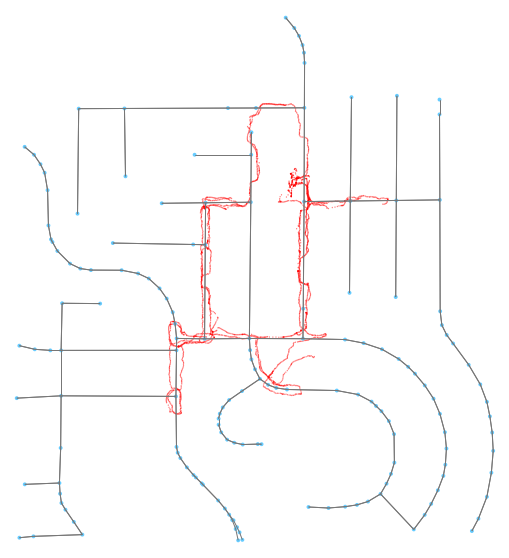

In [2239]:
from descartes.patch import PolygonPatch

# Create the plot fig and ax objects but prevent Matplotlib

# from plotting and closing out the plot operation

fig, ax = ox.plot_graph(G, fig_height=10, 
                        show=False, close=False,
                        edge_color='#777777')


#walk_pois=walk_pois[600:601]

for point in walk_pois:
    patch = PolygonPatch(point.buffer(0.00001), fc='#ff0000', ec='k', linewidth=0, alpha=0.5, zorder=-1)
    ax.add_patch(patch)

In [2240]:
middle_loc

(31.890556650687937, 35.01971310191083)

In [2241]:
df_AS['timestamps_value'].min()

'2019-07-22T22:49:49.825+03:00'

In [2242]:
df_AS['timestamps_value'].max()

'2019-07-22T23:29:27.162+03:00'

In [2243]:
df_AS['gps_speed'].max()

5.889999866485596

In [2244]:

df_AS.columns

Index(['__v', '_id', 'accelerometer_x_axis', 'accelerometer_y_axis',
       'accelerometer_z_axis', 'battery_percentage_value', 'createdAt',
       'device_type', 'gps_accuracy', 'gps_altitude', 'gps_azimuth',
       'gps_latitude', 'gps_longitude', 'gps_speed', 'gravity_x_axis',
       'gravity_y_axis', 'gravity_z_axis', 'gyroscope_tot', 'gyroscope_x_axis',
       'gyroscope_y_axis', 'gyroscope_z_axis', 'linear_acceleration',
       'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'magnetic_field_x_axis',
       'magnetic_field_y_axis', 'magnetic_field_z_axis', 'orientation_x_axis',
       'orientation_y_axis', 'orientation_z_axis', 'pressure_value',
       'proximity_value', 'sample_period', 'stand_still', 'status',
       'testing_mode', 'time_since_start_in_ms', 'timestamp',
       'timestamp_local', 'timestamps_value', 'updatedAt', 'user_id',
       'user_type'],
      dtype='object')

# Animation

In [ ]:
n=0
# JS Animation import is available at http://github.com/jakevdp/JSAnimation
from JSAnimation.IPython_display import display_animation
from matplotlib import animation




# Set up the axes, making sure the axis ratio is equal
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=1, 
                           node_zorder=3, edge_color='b', edge_linewidth=1,
                           fig_height=10,show=False, close=False)
ax.grid(True)

patches = []

# This function moves the polygons as a function of the frame i
def animate(n):
    fig.suptitle(n, fontsize=16)

    point = walk_pois[n]
    patch = PolygonPatch(point.buffer(0.00005), fc='#000000', ec='r', linewidth=0, alpha=0.5, zorder=-1)
    ax.add_patch(patch)
    return patches



anim = animation.FuncAnimation(fig, animate, frames=int(len(walk_pois)), interval=100)
display_animation(anim, default_mode='once')

In [2058]:
middle_loc

(31.7673151, 35.2227059)

In [2059]:
ret_ce=[walk_pois_indices[0]]

for i in walk_pois_indices:
    if i-100>ret_ce[-1]:
        ret_ce+=[i]
ret_ce+=[walk_pois_indices[-1]]

gdf = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)
graph_edges_ = gdf[["geometry", "u", "v"]].values.tolist()

walk_pois_df.loc[ret_ce,'nearest_edges']=walk_pois_df.apply(nearest_edges, graph_edges=graph_edges_, axis=1)

map_indices_edges = walk_pois_df[['nearest_edges']]

map_indices_edges=map_indices_edges[pd.notnull(map_indices_edges['nearest_edges'])]

del walk_pois_df['nearest_edges']

In [2060]:
walk_pois_df['nearest_edge'] = walk_pois_df.apply(nearest_edge,map_indices_edges=map_indices_edges, axis=1)

In [2061]:

walk_pois_df['dist_from_edge']=walk_pois_df.apply(point_edge_distance,axis=1)

print('nearest edge is ready')

unique_locs_df['last_index']=list(unique_locs_df['index'])[1:]+[len(df_AS)]


unique_locs_df['med_index']=unique_locs_df['index']/2+unique_locs_df['last_index']/2


print('graph edges is ready')

walk_pois_df['dist_from_edge']=walk_pois_df.apply(point_edge_distance , axis=1)
walk_pois_df=walk_pois_df.reset_index(drop=True)

close_to_street_df= walk_pois_df[walk_pois_df['dist_from_edge'] < 0.15]

nearest edge is ready
graph edges is ready


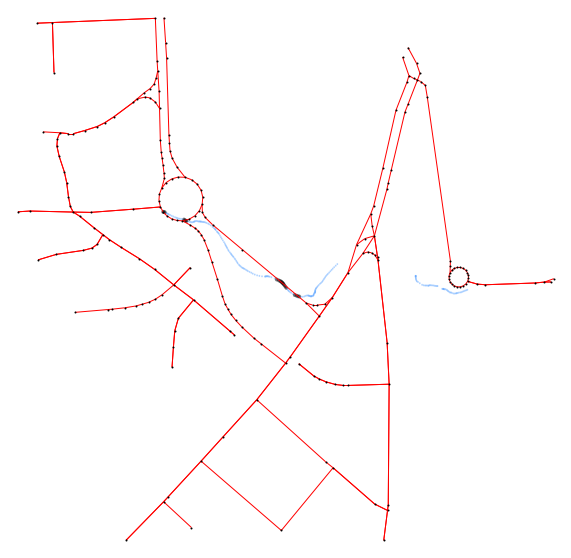

In [2062]:
n=1

nearest_edge_=ox.utils.get_nearest_edge(G, (walk_pois[n].y, walk_pois[n].x))


ec = ['b' if (v==nearest_edge_[1] and u==nearest_edge_[2]) else 'r' for u, v, k in G.edges(keys=True)]
el = [1 if (v==nearest_edge_[1] and u==nearest_edge_[2]) else 1 for u, v, k in G.edges(keys=True)]

fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=1, 
                           node_zorder=3, edge_color=ec, edge_linewidth=el,
                           fig_height=10, show=False, close=False)



cts_walk_pois = [ge.Point(p[0],p[1]) for p in zip(close_to_street_df['gps_longitude'] ,close_to_street_df['gps_latitude'] )]
    
for point in cts_walk_pois[n:n+1]:
    patch = PolygonPatch(point.buffer(0.00001), fc='#000000', ec='r', linewidth=0, alpha=0.5, zorder=-1)
    ax.add_patch(patch)
    
for point in walk_pois:
    patch = PolygonPatch(point.buffer(0.00001), fc='#66AAff', ec='r', linewidth=0, alpha=0.5, zorder=-1)
    ax.add_patch(patch)

for point in cts_walk_pois:
    patch = PolygonPatch(point.buffer(0.00002), fc='#000000', ec='r', linewidth=0, alpha=0.5, zorder=-1)
    ax.add_patch(patch)

In [2063]:
close_to_street_df['prev_diff']=list(close_to_street_df.index)[1:]+[close_to_street_df.index.max()+1]

susp_parts=close_to_street_df[close_to_street_df.index < close_to_street_df.prev_diff-2]



print('computing intersections...')


begin= 0
end=close_to_street_df.index.max()
if len(susp_parts)>0:
    end= susp_parts.index[0]


closest_points_indices=[]
numcrossing=0
for i in range(len(susp_parts)+1):
    print(begin, ' to ', end)
    part_susp_cross=close_to_street_df[(close_to_street_df.index > begin) & (close_to_street_df.index <= end) ]
    intrate = (None,0)
    if len(part_susp_cross) != 0:
        intrate = count_intersections(part_susp_cross, walk_pois_df[(walk_pois_df.index > begin-5) & (walk_pois_df.index <= end+5) ])

    if intrate[1] > 0.25:
        closest_points_indices+=[intrate[0] ]
    print('--------------', intrate, '----------------')
    numcrossing+=intrate[1]
    begin=end
    if i<len(susp_parts)-1:
        end=susp_parts.index[i+1]
    else:
        end=close_to_street_df.index[-1]

crossing_slices=list(unique_locs_df.loc[closest_points_indices]['index'].astype(int))
res=[]
for c in crossing_slices:
    res+=[(df_AS.loc[c-70:c+10]['gps_speed'].min(),df_AS.loc[c-50:c+40]['gps_speed'].max())]

computing intersections...
0  to  106
Int64Index([103, 104, 105, 106], dtype='int64')
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            102, 103, 104, 105, 106, 107, 108, 109, 110, 111],
           dtype='int64', length=112)
min index  104
0 103
105 111
11 108
0 103
105 111
66 105
0 103
105 111
25 110
0 103
105 111
63 110
0 103
105 111
7 110
0 103
105 111
70 106
0 103
105 111
4 109
0 103
105 111
97 105
0 103
105 111
49 108
0 103
105 111
10 111
0 103
105 111
73 108
0 103
105 111
6 110
0 103
105 111
81 108
0 103
105 111
3 108
0 103
105 111
20 109
0 103
105 111
42 105
0 103
105 111
16 109
0 103
105 111
82 105
0 103
105 111
0 107
0 103
105 111
16 106
0 103
105 111
36 105
0 103
105 111
18 106
0 103
105 111
42 109
0 103
105 111
63 108
0 103
105 111
36 105
0 103
105 111
66 105
0 103
105 111
74 110
0 103
105 111
88 108
0 103
105 111
42 111
0 103
105 111
92 109
0 103
105 111
16 106
0 103
105 111
54 105
0 103
105 111
49 105
0 103
105 111
4 109
0 103
105 11

120 209
211 216
172 216
120 209
211 216
201 214
120 209
211 216
205 215
120 209
211 216
193 212
120 209
211 216
122 213
120 209
211 216
170 215
120 209
211 216
163 211
120 209
211 216
190 214
120 209
211 216
152 216
120 209
211 216
134 215
120 209
211 216
157 216
120 209
211 216
129 215
120 209
211 216
148 214
120 209
211 216
205 214
120 209
211 216
201 214
120 209
211 216
177 215
120 209
211 216
206 216
120 209
211 216
133 211
120 209
211 216
126 213
120 209
211 216
170 216
120 209
211 216
209 213
120 209
211 216
166 212
120 209
211 216
139 213
120 209
211 216
139 211
120 209
211 216
130 212
120 209
211 216
196 212
120 209
211 216
201 215
120 209
211 216
184 216
120 209
211 216
136 214
120 209
211 216
162 215
120 209
211 216
130 211
120 209
211 216
144 213
120 209
211 216
120 215
120 209
211 216
160 212
120 209
211 216
162 216
120 209
211 216
168 212
120 209
211 216
180 215
120 209
211 216
188 211
120 209
211 216
193 216
120 209
211 216
144 212
120 209
211 216
185 212
120 209
211 216


In [2064]:
closest_points_indices

[104, 117, 210]

In [2065]:
res

[(0.6657366156578064, 1.373370885848999),
 (1.2423732280731201, 1.3470245599746704),
 (1.2398838996887207, 1.7082157135009766)]

In [2066]:
len(res)

3

In [2067]:
crossing_slices=list(unique_locs_df.loc[closest_points_indices]['med_index'].astype(int))
crossing_slices

[1100, 1224, 2190]

(0, 10)

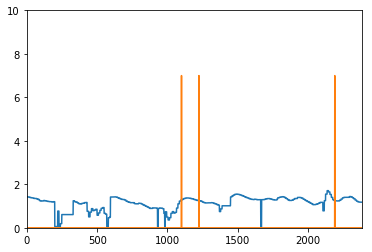

In [2068]:

plt.setp(ax.get_xticklabels(), size=1)

plt.plot(df_AS['gps_speed'])
plt.plot([int(b in crossing_slices)*7 for b in range(len(df_AS))])

axes = plt.gca()
axes.set_xlim([0,len(df_AS)])
axes.set_ylim([0,10])





#plt.show()

In [2297]:
#unique_locs_df

In [2070]:
df_AS['gps_speed'].max()

1.7082157135009766

In [2071]:
df_AS['timestamps_value']=pd.to_datetime(df_AS['timestamps_value'])

In [2072]:
df_AS=df_AS.sort_values('timestamps_value')

In [2073]:
df_AS['next_ts']=list(df_AS['timestamps_value'])[1:]+[df_AS.iloc[-1]['timestamps_value']]

#End analyzing crossings

In [2074]:
df_AS['diff']=df_AS['next_ts']-df_AS['timestamps_value']

In [2075]:
df_AS

,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,gps_accuracy,gps_altitude,gps_azimuth,gps_latitude,gps_longitude,gps_speed,...,user_type,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,linear_acceleration,gyroscope_tot,timestamp,time_since_start_in_ms,next_ts,diff
0,11.344074,9.186832,0.339987,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,4.993852,1.808257,1.523761,5.525414,0.612932,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:09.667000+03:00,00:00:00.098000
1,4.170827,4.951360,-0.294496,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,-2.482878,-2.218577,0.405763,3.354312,0.574424,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:09.767000+03:00,00:00:00.100000
2,3.857177,4.795732,-0.524346,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,-2.796528,-2.374205,0.175912,3.672651,0.782475,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:09.868000+03:00,00:00:00.101000
3,7.204373,8.516436,-2.487652,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,0.550668,1.346498,-1.787393,2.304575,0.814117,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:09.969000+03:00,00:00:00.101000
4,9.627379,10.903527,-3.708732,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,3.448930,3.478548,-2.015677,5.297015,1.727377,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:10.067000+03:00,00:00:00.098000
5,7.972935,9.306546,-4.625739,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,1.782314,1.962181,-2.649277,3.747728,0.919030,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:10.167000+03:00,00:00:00.100000
6,3.538738,5.423032,-2.013585,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,-2.303743,-2.164408,0.099733,3.162569,0.366602,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:10.267000+03:00,00:00:00.100000
7,4.235472,4.101393,-1.841197,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,-1.607009,-3.486048,0.272121,3.848254,0.268269,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:10.366000+03:00,00:00:00.099000
8,6.811712,7.321692,-2.906650,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,1.035798,-0.309755,-0.768919,1.326673,0.594002,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:10.467000+03:00,00:00:00.101000
9,11.605050,9.146130,-1.936968,96,4.182,793.173617,259.0,31.767183,35.224855,1.423307,...,pedestrian,5.582596,1.637325,-0.061337,5.818073,0.388911,2019-08-12 19:00:08.976000+03:00,0.0,2019-08-12 18:59:10.568000+03:00,00:00:00.101000


In [2076]:
brks=df_AS[df_AS['diff'] > '00:00:02'].index

In [2077]:
brks=[0]+list(brks)+[df_AS.index.max()]

In [2078]:
brks

[0, 594, 2380]

In [2079]:
angles_dfs=[df_AS[brks[i]:brks[i+1] ] for i in range(len(brks)-1)]
    

In [2080]:
def get_angle(p1,p2,p3):
    
    a = np.array([p1.x,p1.y])
    b = np.array([p2.x,p2.y])
    c = np.array([p3.x,p3.y])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [2081]:
'''

def get_angle(p1x,p1y,p2x,p2y,p3x,p3y):
    
    if None in [p1x,p1y,p2x,p2y,p3x,p3y]:
        return 0
    
    a = np.array([p1x,p1y])
    b = np.array([p2x,p2y])
    c = np.array([p3x,p3y])

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

'''

'\n\ndef get_angle(p1x,p1y,p2x,p2y,p3x,p3y):\n    \n    if None in [p1x,p1y,p2x,p2y,p3x,p3y]:\n        return 0\n    \n    a = np.array([p1x,p1y])\n    b = np.array([p2x,p2y])\n    c = np.array([p3x,p3y])\n\n    ba = a - b\n    bc = c - b\n\n    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))\n    angle = np.arccos(cosine_angle)\n\n    return np.degrees(angle)\n\n'

In [2082]:
data=pd.DataFrame()
data=data.from_csv('turns.csv')

In [2084]:
data

,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,gps_accuracy,gps_altitude,gps_azimuth,gps_latitude,gps_longitude,gps_speed,...,linear_acceleration_z,linear_acceleration,gyroscope_tot,timestamp,time_since_start_in_ms,next_ts,diff,turn1,turn5,turn10
0,-2.596649,7.803421,2.194427,67,6.919,777.270630,210.000000,31.767039,35.225803,9.000000e-01,...,-0.628753,1.515145,0.322431,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:22.871000+03:00,0 days 00:00:00.100000000,NaN,NaN,NaN
1,-5.285339,11.061920,2.646942,67,6.919,777.270630,210.000000,31.767039,35.225803,9.000000e-01,...,-0.234604,3.605493,0.270800,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:22.971000+03:00,0 days 00:00:00.100000000,NaN,NaN,NaN
2,-1.339691,11.638931,4.861572,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,1.619033,3.347436,0.376365,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.071000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
3,-1.526443,8.935883,5.491257,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,2.154144,2.309065,0.204680,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.171000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
4,-0.403564,6.172974,2.682846,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,-0.580651,3.386909,0.543488,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.271000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
5,-1.952606,6.134659,2.239929,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,-0.925104,3.044862,0.129527,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.371000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
6,-2.594254,8.095505,3.135361,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,0.124129,1.039420,0.132825,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.471000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
7,-1.559967,11.014038,3.511246,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,0.617461,2.144111,0.169204,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.571000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
8,-0.686081,11.083481,2.096268,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,-0.499099,2.775262,0.176093,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.671000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
9,-1.006897,9.718781,1.617432,67,6.828,778.286865,213.000000,31.767032,35.225800,9.000000e-01,...,-0.931931,1.909456,0.307224,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.771000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN


In [2085]:
#data=pd.DataFrame()


for adf in [adf for adf in angles_dfs if adf[['gps_latitude','gps_longitude']].drop_duplicates().shape[0] > 10]:
    
    angles=adf[['gps_latitude','gps_longitude']].drop_duplicates()
            
        
    for dist in [1,5,10]:
        angles['prev_lat']=dist*[None]+list(angles['gps_latitude'])[:-1*dist]
        angles['prev_lon']=dist*[None]+list(angles['gps_longitude'])[:-1*dist]
        angles['next_lat']=list(angles['gps_latitude'])[dist:]+[None]*dist
        angles['next_lon']=list(angles['gps_longitude'])[dist:]+[None]*dist

        angles['turn'+str(dist)]=angles.apply(lambda row: get_angle(Point(row['prev_lat'],row['prev_lon']),
                            Point(row['gps_latitude'],row['gps_longitude']),Point(row['next_lat'],row['next_lon']) ), axis=1)
    
    angles=angles[['gps_latitude','gps_longitude','turn1','turn5','turn10']]

    adf=adf.merge(angles, on=['gps_latitude','gps_longitude'], how="left").set_index(adf.index)

    data=pd.concat([data,adf])


In [2086]:
#data=data.iloc[:20987]

In [2087]:
data

,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,gps_accuracy,gps_altitude,gps_azimuth,gps_latitude,gps_longitude,gps_speed,...,linear_acceleration_z,linear_acceleration,gyroscope_tot,timestamp,time_since_start_in_ms,next_ts,diff,turn1,turn5,turn10
0,-2.596649,7.803421,2.194427,67,6.919,777.270630,210.000000,31.767039,35.225803,0.900000,...,-0.628753,1.515145,0.322431,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:22.871000+03:00,0 days 00:00:00.100000000,NaN,NaN,NaN
1,-5.285339,11.061920,2.646942,67,6.919,777.270630,210.000000,31.767039,35.225803,0.900000,...,-0.234604,3.605493,0.270800,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:22.971000+03:00,0 days 00:00:00.100000000,NaN,NaN,NaN
2,-1.339691,11.638931,4.861572,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,1.619033,3.347436,0.376365,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.071000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
3,-1.526443,8.935883,5.491257,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,2.154144,2.309065,0.204680,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.171000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
4,-0.403564,6.172974,2.682846,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,-0.580651,3.386909,0.543488,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.271000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
5,-1.952606,6.134659,2.239929,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,-0.925104,3.044862,0.129527,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.371000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
6,-2.594254,8.095505,3.135361,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,0.124129,1.039420,0.132825,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.471000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
7,-1.559967,11.014038,3.511246,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,0.617461,2.144111,0.169204,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.571000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
8,-0.686081,11.083481,2.096268,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,-0.499099,2.775262,0.176093,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.671000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
9,-1.006897,9.718781,1.617432,67,6.828,778.286865,213.000000,31.767032,35.225800,0.900000,...,-0.931931,1.909456,0.307224,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.771000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN


In [2088]:
df_AS.shape

(2381, 48)

In [2091]:
data.shape

(162532, 51)

In [2092]:
data.to_csv('turns.csv')

2019-08-25 00:46:28,947| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:46:39,145| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:46:49,286| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:46:59,312| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:47:09,333| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:47:19,359| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:47:29,381| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:47:39,406| ERROR   | Could not establish connection from ('127.0.0.1', 54743) to remote side of the tunnel
2019-08-25 00:47:49,431| ERROR  

In [3238]:
del data

In [571]:
data

,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,gps_accuracy,gps_altitude,gps_azimuth,gps_latitude,gps_longitude,gps_speed,...,linear_acceleration_z,linear_acceleration,gyroscope_tot,timestamp,time_since_start_in_ms,next_ts,diff,turn1,turn5,turn10
0,-0.808182,3.656662,4.811295,93,10.376,302.600006,73.0,31.890091,35.020473,1.40,...,-3.606400,3.883071,0.308699,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,NaN,NaN,NaN
392,-0.147385,2.596024,3.166473,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,-5.132283,5.764922,0.929453,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
393,-0.257523,4.880096,5.390701,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,-2.585112,2.726087,0.716351,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
394,-0.291031,8.643784,7.250992,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,-0.687098,2.990712,0.348748,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
395,0.381729,7.530472,12.736099,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,4.577550,5.035909,0.475736,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
396,1.222107,4.226486,10.193466,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,1.923512,2.491864,0.538593,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
397,1.528564,3.354996,5.311691,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,-2.963550,3.917844,1.033146,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
391,0.412857,5.217682,5.601379,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,-2.697377,2.767006,0.966516,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
398,0.482300,3.168243,5.728271,92,7.127,303.164978,20.0,31.890185,35.020897,1.36,...,-2.927151,3.301026,0.616361,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,121.182985,NaN,NaN
400,0.218933,6.544067,14.519791,92,7.183,303.323242,26.0,31.890191,35.020899,1.35,...,5.906317,6.192596,0.500426,2019-08-20 07:58:23.313000+03:00,0.0,2019-08-20 07:58:23.313000+03:00,0 days,9.635511,NaN,NaN


In [1426]:
data.columns

Index(['__v', '_id', 'accelerometer_x_axis', 'accelerometer_y_axis',
       'accelerometer_z_axis', 'battery_percentage_value', 'createdAt',
       'device_type', 'diff', 'gps_accuracy', 'gps_altitude', 'gps_azimuth',
       'gps_latitude', 'gps_longitude', 'gps_seq_reading', 'gps_speed',
       'gravity_x_axis', 'gravity_y_axis', 'gravity_z_axis', 'gyroscope_tot',
       'gyroscope_x_axis', 'gyroscope_y_axis', 'gyroscope_z_axis', 'index',
       'linear_acceleration', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'magnetic_field_x_axis',
       'magnetic_field_y_axis', 'magnetic_field_z_axis', 'next_ts',
       'orientation_x_axis', 'orientation_y_axis', 'orientation_z_axis',
       'pressure_value', 'proximity_value', 'sample_period', 'stand_still',
       'status', 'str_hash', 'testing_mode', 'time_since_start_in_ms',
       'timestamp', 'timestamp_local', 'timestamps_value', 'turn1', 'turn10',
       'turn5', 'updatedAt', 'user_id', 'user_type'],

In [143]:
data=data[['accelerometer_x_axis', 'accelerometer_y_axis',
       'accelerometer_z_axis', 'battery_percentage_value',
       'gps_accuracy', 'gps_altitude', 'gps_azimuth',
       'gps_latitude', 'gps_longitude', 'gps_seq_reading', 'gps_speed',
       'gravity_x_axis', 'gravity_y_axis', 'gravity_z_axis', 'gyroscope_tot',
       'gyroscope_x_axis', 'gyroscope_y_axis', 'gyroscope_z_axis', 
       'linear_acceleration', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'magnetic_field_x_axis',
       'magnetic_field_y_axis', 'magnetic_field_z_axis',
       'orientation_x_axis', 'orientation_y_axis', 'orientation_z_axis',
       'pressure_value', 'proximity_value',
#       'str_hash',
        'turn1', 'turn10',
       'turn5',  ]]

In [144]:
data['proximity_value'].unique()

array([nan,  0.,  1.])

In [148]:
data=data.fillna(0)

In [150]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.2, shuffle=False)


rf = RandomForestRegressor()


fitted = rf.fit(train.drop(['turn1', 'turn10', 'turn5'] , axis=1), train['turn1'])
pred = fitted.predict(test.drop(['turn1', 'turn10', 'turn5'] , axis=1))

In [151]:
pred

array([178.9471685 , 178.9471685 , 178.9471685 , ..., 103.30858897,
       103.30858897, 103.30858897])

In [177]:
[a for a in list(zip(pred,test['turn1'])) if int(a[0])==int(a[1])]

[(178.94716850207809, 178.94716850207809),
 (178.94716850207809, 178.94716850207809),
 (178.94716850207809, 178.94716850207809),
 (178.94716850207809, 178.94716850207809),
 (178.94716850207809, 178.94716850207809),
 (178.94716850207809, 178.94716850207809),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (176.8229544040368, 176.51506288458037),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493, 177.95334946904012),
 (177.03011123044493,

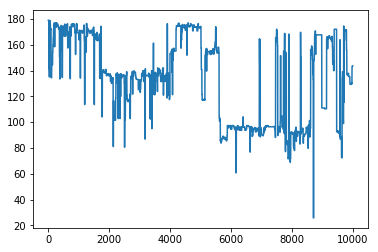

In [171]:

plt.setp(ax.get_xticklabels(), size=1)

plt.plot(pred[0:10000])

In [172]:
len(test['turn1'])

45053

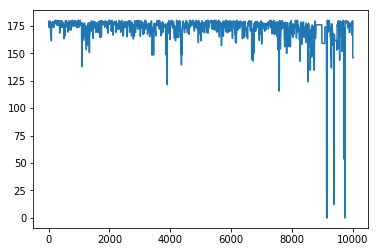

In [173]:

plt.setp(ax.get_xticklabels(), size=1)

plt.plot(test.reset_index().iloc[0:10000]['turn1'])

In [169]:
list(zip(rf.feature_importances_,data.columns))

[(0.0, 'accelerometer_x_axis'),
 (0.0, 'accelerometer_y_axis'),
 (0.0, 'accelerometer_z_axis'),
 (0.0, 'battery_percentage_value'),
 (0.05778000475002913, 'gps_accuracy'),
 (0.20999569560478623, 'gps_altitude'),
 (0.18683614352887287, 'gps_azimuth'),
 (0.20056192561110092, 'gps_latitude'),
 (0.14820406217270282, 'gps_longitude'),
 (0.0, 'gps_seq_reading'),
 (0.19662216833250795, 'gps_speed'),
 (0.0, 'gravity_x_axis'),
 (0.0, 'gravity_y_axis'),
 (0.0, 'gravity_z_axis'),
 (0.0, 'gyroscope_tot'),
 (0.0, 'gyroscope_x_axis'),
 (0.0, 'gyroscope_y_axis'),
 (0.0, 'gyroscope_z_axis'),
 (0.0, 'linear_acceleration'),
 (0.0, 'linear_acceleration_x'),
 (0.0, 'linear_acceleration_y'),
 (0.0, 'linear_acceleration_z'),
 (0.0, 'magnetic_field_x_axis'),
 (0.0, 'magnetic_field_y_axis'),
 (0.0, 'magnetic_field_z_axis'),
 (0.0, 'orientation_x_axis'),
 (0.0, 'orientation_y_axis'),
 (0.0, 'orientation_z_axis'),
 (0.0, 'pressure_value'),
 (0.0, 'proximity_value')]

In [179]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.2, shuffle=False)


rf = RandomForestRegressor()


fitted = rf.fit(train.drop(['turn1', 'turn10', 'turn5'] , axis=1), train['turn5'])
pred = fitted.predict(test.drop(['turn1', 'turn10', 'turn5'] , axis=1))

In [180]:
list(zip(rf.feature_importances_,data.columns))

[(0.0, 'accelerometer_x_axis'),
 (0.0, 'accelerometer_y_axis'),
 (0.0, 'accelerometer_z_axis'),
 (0.0, 'battery_percentage_value'),
 (0.09890775548195878, 'gps_accuracy'),
 (0.1664867214282528, 'gps_altitude'),
 (0.10834572072913648, 'gps_azimuth'),
 (0.225769828415612, 'gps_latitude'),
 (0.15025322820676462, 'gps_longitude'),
 (0.0, 'gps_seq_reading'),
 (0.2502367457382753, 'gps_speed'),
 (0.0, 'gravity_x_axis'),
 (0.0, 'gravity_y_axis'),
 (0.0, 'gravity_z_axis'),
 (0.0, 'gyroscope_tot'),
 (0.0, 'gyroscope_x_axis'),
 (0.0, 'gyroscope_y_axis'),
 (0.0, 'gyroscope_z_axis'),
 (0.0, 'linear_acceleration'),
 (0.0, 'linear_acceleration_x'),
 (0.0, 'linear_acceleration_y'),
 (0.0, 'linear_acceleration_z'),
 (0.0, 'magnetic_field_x_axis'),
 (0.0, 'magnetic_field_y_axis'),
 (0.0, 'magnetic_field_z_axis'),
 (0.0, 'orientation_x_axis'),
 (0.0, 'orientation_y_axis'),
 (0.0, 'orientation_z_axis'),
 (0.0, 'pressure_value'),
 (0.0, 'proximity_value')]

In [185]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.2, shuffle=False)


rf = RandomForestRegressor()


fitted = rf.fit(train.drop(['turn1', 'turn10', 'turn5'] , axis=1), train['turn10'])
pred = fitted.predict(test.drop(['turn1', 'turn10', 'turn5'] , axis=1))

In [186]:
list(zip(rf.feature_importances_,data.columns))

[(0.0, 'accelerometer_x_axis'),
 (0.0, 'accelerometer_y_axis'),
 (0.0, 'accelerometer_z_axis'),
 (0.0, 'battery_percentage_value'),
 (0.09893477521966168, 'gps_accuracy'),
 (0.15088094045034975, 'gps_altitude'),
 (0.0775163688195991, 'gps_azimuth'),
 (0.29891107353374347, 'gps_latitude'),
 (0.20376834640649788, 'gps_longitude'),
 (0.0, 'gps_seq_reading'),
 (0.16998849557014817, 'gps_speed'),
 (0.0, 'gravity_x_axis'),
 (0.0, 'gravity_y_axis'),
 (0.0, 'gravity_z_axis'),
 (0.0, 'gyroscope_tot'),
 (0.0, 'gyroscope_x_axis'),
 (0.0, 'gyroscope_y_axis'),
 (0.0, 'gyroscope_z_axis'),
 (0.0, 'linear_acceleration'),
 (0.0, 'linear_acceleration_x'),
 (0.0, 'linear_acceleration_y'),
 (0.0, 'linear_acceleration_z'),
 (0.0, 'magnetic_field_x_axis'),
 (0.0, 'magnetic_field_y_axis'),
 (0.0, 'magnetic_field_z_axis'),
 (0.0, 'orientation_x_axis'),
 (0.0, 'orientation_y_axis'),
 (0.0, 'orientation_z_axis'),
 (0.0, 'pressure_value'),
 (0.0, 'proximity_value')]

In [178]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test['turn1'], pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test['turn1'], pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['turn1'], pred)))

Mean Absolute Error: 51.01606676314399
Mean Squared Error: 3738.7997659685766
Root Mean Squared Error: 61.14572565575272


In [181]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test['turn5'], pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test['turn5'], pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['turn5'], pred)))

Mean Absolute Error: 41.986504873490965
Mean Squared Error: 3215.133257325968
Root Mean Squared Error: 56.70214508575463


In [187]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test['turn10'], pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test['turn10'], pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['turn10'], pred)))

Mean Absolute Error: 60.836124262723914
Mean Squared Error: 5774.017372370697
Root Mean Squared Error: 75.9869552776705


In [189]:
data[data['accelerometer_x_axis']==0]

,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,gps_accuracy,gps_altitude,gps_azimuth,gps_latitude,gps_longitude,gps_seq_reading,...,magnetic_field_y_axis,magnetic_field_z_axis,orientation_x_axis,orientation_y_axis,orientation_z_axis,pressure_value,proximity_value,turn1,turn10,turn5
0,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,5.934,773.666748,90.000000,31.767201,35.225280,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [190]:
data.shape

(225263, 33)

FF1rx9kMHgbqb7gjF1Xjz1ojkW12 gives not clear path with many discontinuities

In [ ]:
FF1rx9kMHgbqb7gjF1Xjz1ojkW12

In [415]:
data[data['accelerometer_x_axis'].apply(lambda x: pd.isnull(x))]

,__v,_id,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,createdAt,device_type,diff,gps_accuracy,...,time_since_start_in_ms,timestamp,timestamp_local,timestamps_value,turn1,turn10,turn5,updatedAt,user_id,user_type
0,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.101000000,5.934,...,NaN,2019-08-12 15:10:04.019000+03:00,NaN,2019-08-12T15:10:04.019+03:00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.120000+03:00,NaN,2019-08-12T15:10:04.120+03:00,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.220000+03:00,NaN,2019-08-12T15:10:04.220+03:00,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.320000+03:00,NaN,2019-08-12T15:10:04.320+03:00,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.420000+03:00,NaN,2019-08-12T15:10:04.420+03:00,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.520000+03:00,NaN,2019-08-12T15:10:04.520+03:00,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.620000+03:00,NaN,2019-08-12T15:10:04.620+03:00,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.720000+03:00,NaN,2019-08-12T15:10:04.720+03:00,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.100000000,5.934,...,NaN,2019-08-12 15:10:04.820000+03:00,NaN,2019-08-12T15:10:04.820+03:00,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,5d51575a48f5006187ac7761,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.099000000,5.934,...,NaN,2019-08-12 15:10:04.920000+03:00,NaN,2019-08-12T15:10:04.920+03:00,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
data.isnull().sum()

__v                         215446
_id                              0
accelerometer_x_axis        215446
accelerometer_y_axis        215446
accelerometer_z_axis        215446
battery_percentage_value    215446
createdAt                   215446
device_type                 215446
diff                             0
gps_accuracy                     0
gps_altitude                     0
gps_azimuth                  10776
gps_latitude                     0
gps_longitude                    0
gps_seq_reading             215446
gps_speed                        0
gravity_x_axis              215446
gravity_y_axis              215446
gravity_z_axis              215446
gyroscope_tot               215446
gyroscope_x_axis            215446
gyroscope_y_axis            215446
gyroscope_z_axis            215446
index                       215446
linear_acceleration         215446
linear_acceleration_x       215446
linear_acceleration_y       215446
linear_acceleration_z       215446
magnetic_field_x_axi

In [422]:
data.groupby(['_id'])['accelerometer_x_axis'].count()

_id
5d5bca10d997ab0b6038b67d      0
5d5bca10d997ab0b6038b680      0
5d5bca10d997ab0b6038b68d      0
5d361814c587af7b09398859    432
5d361cb0c587af7b09398881    572
5d361cb1c587af7b09398883    580
5d361cb2c587af7b09398885    578
5d361cb2c587af7b09398887    557
5d361cb4c587af7b09398889    572
5d361cb5c587af7b0939888b    579
5d361cb6c587af7b0939888d    579
5d361cb6c587af7b0939888f    587
5d361cb8c587af7b09398891    544
5d361cbac587af7b09398893    580
5d361cbac587af7b09398895    547
5d361cbbc587af7b09398897    549
5d361cbcc587af7b09398899    535
5d361cc0c587af7b093988a1    548
5d361cc1c587af7b093988a3    585
5d361ccdc587af7b093988c7    571
5d361ccdc587af7b093988cb    579
5d361ccec587af7b093988d1    553
5d361cd0c587af7b093988d5    581
5d361cd0c587af7b093988d7    390
5d51529748f5006187ac76f1      0
5d51529748f5006187ac76f3      0
5d51529748f5006187ac76f6      0
5d51529748f5006187ac76f7      0
5d51529748f5006187ac76f9      0
5d51529748f5006187ac76fb      0
                           ... 
5d5a

In [363]:
data.columns

Index(['__v', '_id', 'accelerometer_x_axis', 'accelerometer_y_axis',
       'accelerometer_z_axis', 'battery_percentage_value', 'createdAt',
       'device_type', 'diff', 'gps_accuracy', 'gps_altitude', 'gps_azimuth',
       'gps_latitude', 'gps_longitude', 'gps_seq_reading', 'gps_speed',
       'gravity_x_axis', 'gravity_y_axis', 'gravity_z_axis', 'gyroscope_tot',
       'gyroscope_x_axis', 'gyroscope_y_axis', 'gyroscope_z_axis', 'index',
       'linear_acceleration', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'magnetic_field_x_axis',
       'magnetic_field_y_axis', 'magnetic_field_z_axis', 'next_ts',
       'orientation_x_axis', 'orientation_y_axis', 'orientation_z_axis',
       'pressure_value', 'proximity_value', 'sample_period', 'stand_still',
       'status', 'str_hash', 'testing_mode', 'time_since_start_in_ms',
       'timestamp', 'timestamp_local', 'timestamps_value', 'turn1', 'turn10',
       'turn5', 'updatedAt', 'user_id', 'user_type'],

In [1638]:
data

,accelerometer_x_axis,accelerometer_y_axis,accelerometer_z_axis,battery_percentage_value,gps_accuracy,gps_altitude,gps_azimuth,gps_latitude,gps_longitude,gps_speed,...,linear_acceleration_z,linear_acceleration,gyroscope_tot,timestamp,time_since_start_in_ms,next_ts,diff,turn1,turn5,turn10
0,-2.596649,7.803421,2.194427,67,6.919,777.270630,210.000000,31.767039,35.225803,0.90,...,-0.628753,1.515145,0.322431,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:22.871000+03:00,0 days 00:00:00.100000000,NaN,NaN,NaN
1,-5.285339,11.061920,2.646942,67,6.919,777.270630,210.000000,31.767039,35.225803,0.90,...,-0.234604,3.605493,0.270800,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:22.971000+03:00,0 days 00:00:00.100000000,NaN,NaN,NaN
2,-1.339691,11.638931,4.861572,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,1.619033,3.347436,0.376365,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.071000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
3,-1.526443,8.935883,5.491257,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,2.154144,2.309065,0.204680,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.171000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
4,-0.403564,6.172974,2.682846,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,-0.580651,3.386909,0.543488,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.271000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
5,-1.952606,6.134659,2.239929,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,-0.925104,3.044862,0.129527,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.371000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
6,-2.594254,8.095505,3.135361,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,0.124129,1.039420,0.132825,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.471000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
7,-1.559967,11.014038,3.511246,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,0.617461,2.144111,0.169204,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.571000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
8,-0.686081,11.083481,2.096268,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,-0.499099,2.775262,0.176093,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.671000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
9,-1.006897,9.718781,1.617432,67,6.828,778.286865,213.000000,31.767032,35.225800,0.90,...,-0.931931,1.909456,0.307224,2019-08-12 15:17:22.499000+03:00,0.0,2019-08-12 15:16:23.771000+03:00,0 days 00:00:00.100000000,174.704183,NaN,NaN
